### SIDM with pyHalo

This notebook demonstrates how to generate realizations of self-interacting dark matter, in which a fraction of halos core collapse. 

In [1]:
from pyHalo.realization_extensions import RealizationExtensions
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
from pyHalo.PresetModels.cdm import CDM
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from lenstronomy.LensModel.lens_model import LensModel

In [ ]:
zlens, zsource = 0.5, 2.0
mass_ranges = [[6.0, 7.5], [7.5, 8.5], [8.5, 10.0]]

cdm_realization = CDM(zlens, zsource)
ext = RealizationExtensions(cdm_realization)

log10_subhalo_time_scaling = 0.0
sigma_eff = [0, 0, 0.0]
cdm_realization0 = ext.toSIDM_from_cross_section(mass_ranges, sigma_eff, log10_subhalo_time_scaling)

sigma_eff = [1.5,1.5,1.5]
sidm_realization1 = ext.toSIDM_from_cross_section(mass_ranges, sigma_eff, log10_subhalo_time_scaling)

sigma_eff = [2.5,2.5,2.5]
sidm_realization2 = ext.toSIDM_from_cross_section(mass_ranges, sigma_eff, log10_subhalo_time_scaling)

sigma_eff = [3.,3.,3.]
sidm_realization3 = ext.toSIDM_from_cross_section(mass_ranges, sigma_eff, log10_subhalo_time_scaling)

t = []
for halo in sidm_realization1.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='r',density=True, bins=40,range=(0, 10))
plt.show()
t = []
for halo in sidm_realization2.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='k',density=True, bins=40,range=(0, 10))
plt.show()
t = []
for halo in sidm_realization3.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='m',density=True, bins=40,range=(0, 10))

### Now we can compute the effective multiplane convergence with SIDM halos

In [ ]:
npix = 350 
grid_resolution_critcurves = 0.04
grid_size = 1.5
_x = _y = np.linspace(-grid_size, grid_size, npix)
xx, yy = np.meshgrid(_x, _y)
shape0 = xx.shape

# power law plus shear macromodel
kwargs_macromodel = [{'theta_E': 1., 'center_x': 0., 'center_y': 0., 'e1': 0.2, 'e2': -0.1, 'gamma': 2.},
                    {'gamma1': -0.03, 'gamma2': 0.02}]
lens_model_list_macro = ['EPL', 'SHEAR']
lens_model_macro = LensModel(lens_model_list_macro)

residual_kappa_map_list = []
ra_crit_list_list = []
dec_crit_list_list = []

for sidm_realization in [cdm_realization0, sidm_realization1, sidm_realization2, sidm_realization3]:
    print(sidm_realization)
    
    lens_model_list, lens_redshift_array, kwargs_halos, _ = sidm_realization.lensing_quantities()

    astropy_instance = sidm_realization.astropy_instance

    lens_model_list_full = lens_model_list_macro + lens_model_list
    lens_redshift_list_full = [zlens, zlens] + list(lens_redshift_array)
    kwargs_lens_full = kwargs_macromodel + kwargs_halos

    lens_model_full = LensModel(lens_model_list_full, zlens, zsource, 
                            lens_redshift_list_full, cosmo=astropy_instance, multi_plane=True, 
                            numerical_alpha_class=None)


    kappa_full = lens_model_full.kappa(xx.ravel(), yy.ravel(), kwargs_lens_full).reshape(shape0)
    kappa_macro = lens_model_macro.kappa(xx.ravel(), yy.ravel(), kwargs_macromodel).reshape(shape0)
    residual_kappa_map_list.append(kappa_full - kappa_macro)

    lens_model_extension = LensModelExtensions(lens_model_full)
    
    ra_crit_list, dec_crit_list, _, _ = lens_model_extension.critical_curve_caustics(kwargs_lens_full, 
                                                                compute_window=2*grid_size, 
                                                                grid_scale=grid_resolution_critcurves)
    ra_crit_list_list.append(ra_crit_list)
    dec_crit_list_list.append(dec_crit_list)


### Make the figure

In [ ]:
for (kap, rac, dec) in zip(residual_kappa_map_list, ra_crit_list_list, dec_crit_list_list):
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.imshow(kap- np.mean(kap), vmin=-0.1, vmax=0.1, cmap='seismic',
             extent=[-grid_size, grid_size, -grid_size, grid_size], origin='lower')
    for i in range(0, len(rac)):
        ax.plot(rac[i], dec[i], color='k', lw=1)
    plt.show()

In [ ]:
zlens, zsource = 0.5, 2.0
mass_ranges = [[6.0, 7.5], [7.5, 8.5], [8.5, 10.0]]

cdm_realization = CDM(zlens, zsource)
ext = RealizationExtensions(cdm_realization)

log10_subhalo_time_scaling = -0.5
sigma_eff = [2.7,2.3,1.5]
cdm_realization0 = ext.toSIDM_from_cross_section(mass_ranges, sigma_eff, log10_subhalo_time_scaling)

log10_subhalo_time_scaling = 0.4
sidm_realization1 = ext.toSIDM_from_cross_section(mass_ranges, sigma_eff, log10_subhalo_time_scaling)

log10_subhalo_time_scaling = 0.8
sidm_realization2 = ext.toSIDM_from_cross_section(mass_ranges, sigma_eff, log10_subhalo_time_scaling)

log10_subhalo_time_scaling = 1.3
sidm_realization3 = ext.toSIDM_from_cross_section(mass_ranges, sigma_eff, log10_subhalo_time_scaling)

t = []
for halo in sidm_realization1.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='r',density=True, bins=40,range=(0, 10))
plt.show()
t = []
for halo in sidm_realization2.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='k',density=True, bins=40,range=(0, 10))
plt.show()
t = []
for halo in sidm_realization3.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='m',density=True, bins=40,range=(0, 10))

In [ ]:
npix = 250 
grid_resolution_critcurves = 0.04
grid_size = 1.5
_x = _y = np.linspace(-grid_size, grid_size, npix)
xx, yy = np.meshgrid(_x, _y)
shape0 = xx.shape

# power law plus shear macromodel
kwargs_macromodel = [{'theta_E': 1., 'center_x': 0., 'center_y': 0., 'e1': 0.2, 'e2': -0.1, 'gamma': 2.},
                    {'gamma1': -0.03, 'gamma2': 0.02}]
lens_model_list_macro = ['EPL', 'SHEAR']
lens_model_macro = LensModel(lens_model_list_macro)

residual_kappa_map_list = []
ra_crit_list_list = []
dec_crit_list_list = []

for sidm_realization in [cdm_realization0, sidm_realization1, sidm_realization2, sidm_realization3]:
    print(sidm_realization)
    
    lens_model_list, lens_redshift_array, kwargs_halos, _ = sidm_realization.lensing_quantities()

    astropy_instance = sidm_realization.astropy_instance

    lens_model_list_full = lens_model_list_macro + lens_model_list
    lens_redshift_list_full = [zlens, zlens] + list(lens_redshift_array)
    kwargs_lens_full = kwargs_macromodel + kwargs_halos

    lens_model_full = LensModel(lens_model_list_full, zlens, zsource, 
                            lens_redshift_list_full, cosmo=astropy_instance, multi_plane=True, 
                            numerical_alpha_class=None)


    kappa_full = lens_model_full.kappa(xx.ravel(), yy.ravel(), kwargs_lens_full).reshape(shape0)
    kappa_macro = lens_model_macro.kappa(xx.ravel(), yy.ravel(), kwargs_macromodel).reshape(shape0)
    residual_kappa_map_list.append(kappa_full - kappa_macro)

    lens_model_extension = LensModelExtensions(lens_model_full)
    
    ra_crit_list, dec_crit_list, _, _ = lens_model_extension.critical_curve_caustics(kwargs_lens_full, 
                                                                compute_window=2*grid_size, 
                                                                grid_scale=grid_resolution_critcurves)
    ra_crit_list_list.append(ra_crit_list)
    dec_crit_list_list.append(dec_crit_list)


In [ ]:
for (kap, rac, dec) in zip(residual_kappa_map_list, ra_crit_list_list, dec_crit_list_list):
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.imshow(kap-np.mean(kap), vmin=-0.1, vmax=0.1, cmap='seismic',
             extent=[-grid_size, grid_size, -grid_size, grid_size], origin='lower')
    for i in range(0, len(rac)):
        ax.plot(rac[i], dec[i], color='k', lw=1)
    plt.show()

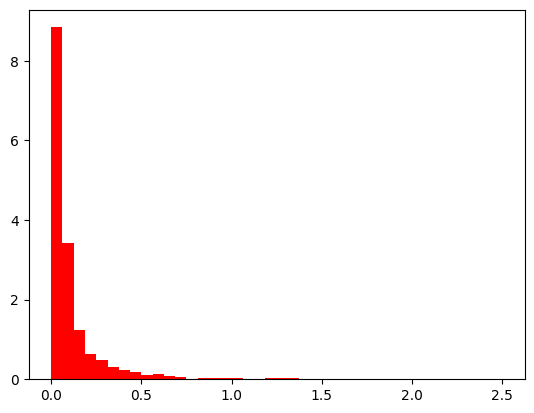

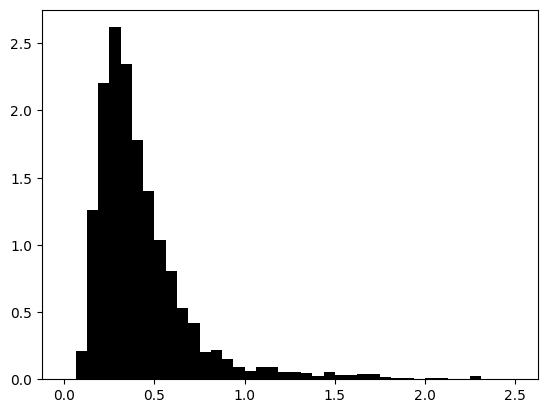

In [42]:
zlens, zsource = 0.5, 2.0
mass_ranges = [[6.0, 8.0], [8.0, 10.0]]
cdm_realization = CDM(zlens, zsource, LOS_normalization=0.0)


log10_subhalo_time_scaling = None
bound_mass_timescale = 0.0

sigma_eff = [2.7, 2.7]
ext = RealizationExtensions(cdm_realization)
bound_mass_timescale = 0.0
sidm_realization1 = ext.toSIDM_from_cross_section_bound_mass_timescale(mass_ranges, 
                                                                       sigma_eff, 
                                                                       bound_mass_timescale)
bound_mass_timescale = 3.0
sidm_realization2 = ext.toSIDM_from_cross_section_bound_mass_timescale(mass_ranges, 
                                                                       sigma_eff, 
                                                                       bound_mass_timescale)

t = []
for halo in sidm_realization1.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='r',density=True, bins=40,range=(0, 2.5))
plt.show()
t = []
for halo in sidm_realization2.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='k',density=True, bins=40,range=(0, 2.5))
plt.show()


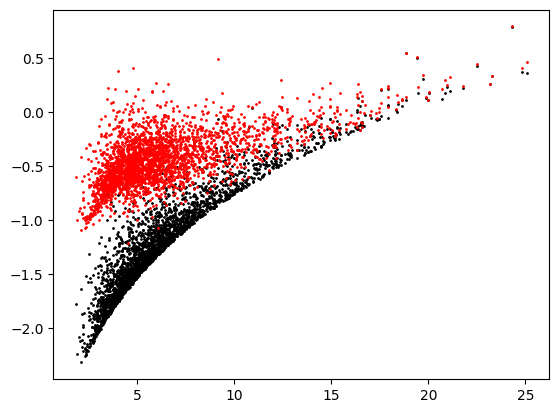

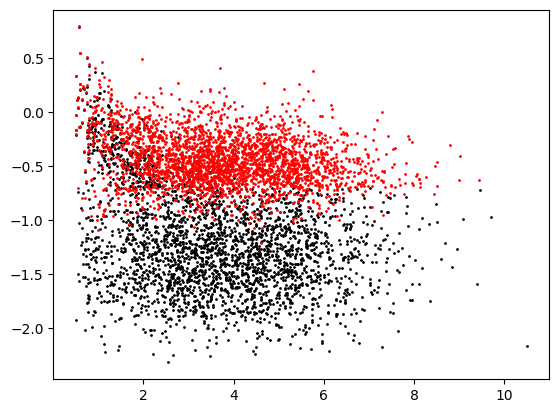

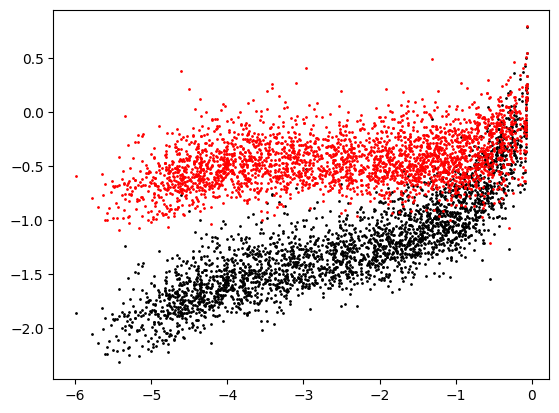

In [40]:
c1 = []
z_infall1 = []
t_over_tc1 = []
bound_mass_ratio1 = []
for halo in sidm_realization1.halos:
    if not halo.is_subhalo: continue
    c1.append(halo.c)
    z_infall1.append(halo.z_infall)
    t_over_tc1.append(halo.t_over_tc)
    bound_mass_ratio1.append(halo.bound_mass / halo.mass)

c2 = []
z_infall2 = []
t_over_tc2 = []
bound_mass_ratio2 = []
for halo in sidm_realization2.halos:
    if not halo.is_subhalo: continue
    c2.append(halo.c)
    z_infall2.append(halo.z_infall)
    t_over_tc2.append(halo.t_over_tc)
    bound_mass_ratio2.append(halo.bound_mass / halo.mass)

plt.scatter(c1, np.log10(t_over_tc1),s=1,color='k')
plt.scatter(c2, np.log10(t_over_tc2),s=1,color='r'); plt.show()

plt.scatter(z_infall1, np.log10(t_over_tc1),s=1,color='k')
plt.scatter(z_infall2, np.log10(t_over_tc2),s=1,color='r'); plt.show()

plt.scatter(np.log10(bound_mass_ratio1), np.log10(t_over_tc1),s=1,color='k')
plt.scatter(np.log10(bound_mass_ratio2), np.log10(t_over_tc2),s=1,color='r'); plt.show()


In [34]:
npix = 350 
grid_resolution_critcurves = 0.04
grid_size = 1.5
_x = _y = np.linspace(-grid_size, grid_size, npix)
xx, yy = np.meshgrid(_x, _y)
shape0 = xx.shape

# power law plus shear macromodel
kwargs_macromodel = [{'theta_E': 1., 'center_x': 0., 'center_y': 0., 'e1': 0.2, 'e2': -0.1, 'gamma': 2.},
                    {'gamma1': -0.03, 'gamma2': 0.02}]
lens_model_list_macro = ['EPL', 'SHEAR']
lens_model_macro = LensModel(lens_model_list_macro)

residual_kappa_map_list = []
ra_crit_list_list = []
dec_crit_list_list = []

for sidm_realization in [cdm_realization, sidm_realization1, sidm_realization2]:
    print(sidm_realization)
    
    lens_model_list, lens_redshift_array, kwargs_halos, _ = sidm_realization.lensing_quantities()

    astropy_instance = sidm_realization.astropy_instance

    lens_model_list_full = lens_model_list_macro + lens_model_list
    lens_redshift_list_full = [zlens, zlens] + list(lens_redshift_array)
    kwargs_lens_full = kwargs_macromodel + kwargs_halos

    lens_model_full = LensModel(lens_model_list_full, zlens, zsource, 
                            lens_redshift_list_full, cosmo=astropy_instance, multi_plane=True, 
                            numerical_alpha_class=None)


    kappa_full = lens_model_full.kappa(xx.ravel(), yy.ravel(), kwargs_lens_full).reshape(shape0)
    kappa_macro = lens_model_macro.kappa(xx.ravel(), yy.ravel(), kwargs_macromodel).reshape(shape0)
    residual_kappa_map_list.append(kappa_full - kappa_macro)

    lens_model_extension = LensModelExtensions(lens_model_full)
    
    ra_crit_list, dec_crit_list, _, _ = lens_model_extension.critical_curve_caustics(kwargs_lens_full, 
                                                                compute_window=2*grid_size, 
                                                                grid_scale=grid_resolution_critcurves)
    ra_crit_list_list.append(ra_crit_list)
    dec_crit_list_list.append(dec_crit_list)


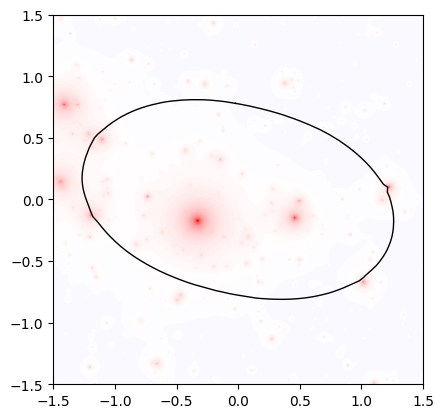

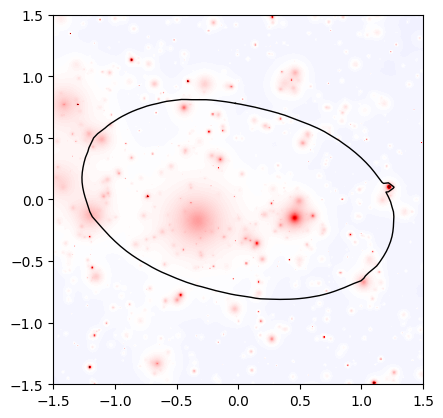

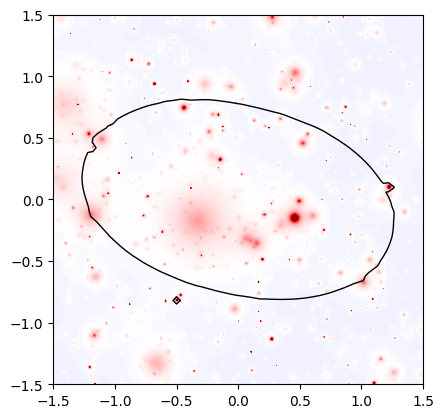

In [35]:
for (kap, rac, dec) in zip(residual_kappa_map_list, ra_crit_list_list, dec_crit_list_list):
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.imshow(kap- np.mean(kap), vmin=-0.1, vmax=0.1, cmap='seismic',
             extent=[-grid_size, grid_size, -grid_size, grid_size], origin='lower')
    for i in range(0, len(rac)):
        ax.plot(rac[i], dec[i], color='k', lw=1)
    plt.show()

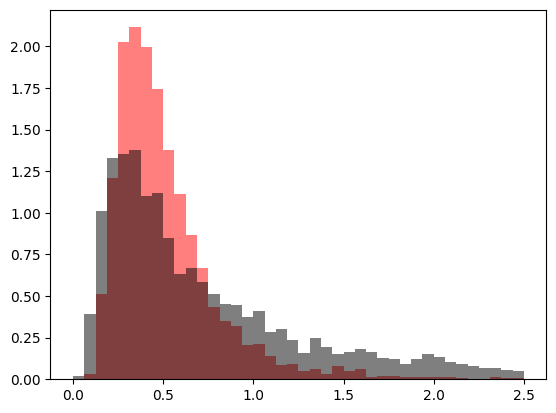

In [53]:
zlens, zsource = 0.5, 2.0
mass_ranges = [[6.0, 8.0], [8.0, 10.0]]
cdm_realization = CDM(zlens, zsource, LOS_normalization=0.0)


log10_subhalo_time_scaling = None
bound_mass_timescale = 0.0

sigma_eff = [2.7, 2.7]
ext = RealizationExtensions(cdm_realization)
bound_mass_timescale = 4.
sidm_realization1 = ext.toSIDM_from_cross_section_bound_mass_timescale(mass_ranges, 
                                                                       sigma_eff, 
                                                                       bound_mass_timescale)
subhalo_rescale = 1.1
sidm_realization2 = ext.toSIDM_from_cross_section(mass_ranges, sigma_eff, subhalo_rescale)

t = []
for halo in sidm_realization1.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='r',density=True, bins=40,range=(0, 2.5),alpha=0.5)
#plt.show()
t = []
for halo in sidm_realization2.halos:
    t.append(halo.t_over_tc)
plt.hist(t, color='k',density=True, bins=40,range=(0, 2.5),alpha=0.5)
plt.show()
